### Загрузка пакетов

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка датафрейма

In [2]:
churn_df = pd.read_csv('telecom_churn_clean.csv')
print(churn_df)

      Unnamed: 0  account_length  area_code  international_plan  \
0              0             128        415                   0   
1              1             107        415                   0   
2              2             137        415                   0   
3              3              84        408                   1   
4              4              75        415                   1   
...          ...             ...        ...                 ...   
3328        3328             192        415                   0   
3329        3329              68        415                   0   
3330        3330              28        510                   0   
3331        3331             184        510                   1   
3332        3332              74        415                   0   

      voice_mail_plan  number_vmail_messages  total_day_minutes  \
0                   1                     25              265.1   
1                   1                     26              161

In [3]:
print(churn_df.columns)

Index(['Unnamed: 0', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')


### Разделим переменные на целевую и независимые

In [4]:
y = churn_df['churn'].values
X = churn_df[['account_length', 'customer_service_calls']].values

In [5]:
print(X)

[[128   1]
 [107   1]
 [137   0]
 ...
 [ 28   2]
 [184   2]
 [ 74   0]]


In [6]:
print(y)

[0 0 0 ... 0 0 0]


### Построение классификатора

In [7]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### Создание набора для тестирования

In [32]:
X_new = np.array([
    [30, 18],
    [107, 24],
    [213, 11],
    [200, 25],
    [100,5]]
)

### Предсказание

In [33]:
y_pred = knn.predict(X_new)
print(y_pred)

[0 1 0 0 0]


### Разбитие данных

In [34]:
from sklearn.model_selection import train_test_split
X = churn_df.drop('churn', axis=1).values
y = churn_df['churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024, stratify=y)

### Обучение и предсказание

In [35]:
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8590704647676162


### Создание множества соседей

In [36]:
neighbors = np.arange(1,31)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] =knn.score(X_test, y_test)

print(neighbors)
print(train_accuracies)
print(test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
{1: 1.0, 2: 0.885596399099775, 3: 0.8942235558889723, 4: 0.8724681170292573, 5: 0.8750937734433608, 6: 0.8630907726931732, 7: 0.8690922730682671, 8: 0.8612153038259565, 9: 0.8642160540135033, 10: 0.8589647411852963, 11: 0.8612153038259565, 12: 0.8567141785446362, 13: 0.8582145536384096, 14: 0.8563390847711928, 15: 0.8570892723180795, 16: 0.8559639909977494, 17: 0.8567141785446362, 18: 0.8555888972243061, 19: 0.8559639909977494, 20: 0.8552138034508627, 21: 0.8552138034508627, 22: 0.8552138034508627, 23: 0.8552138034508627, 24: 0.8552138034508627, 25: 0.8552138034508627, 26: 0.8552138034508627, 27: 0.8552138034508627, 28: 0.8552138034508627, 29: 0.8552138034508627, 30: 0.8552138034508627}
{1: 0.7991004497751124, 2: 0.8590704647676162, 3: 0.8440779610194903, 4: 0.8515742128935532, 5: 0.8590704647676162, 6: 0.8590704647676162, 7: 0.8590704647676162, 8: 0.8575712143928036, 9: 0.856071964017991, 10: 

### Оценка модели от количества соседей

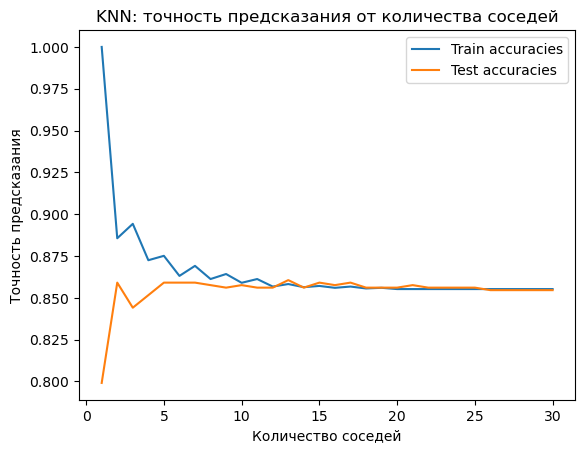

In [37]:
plt.title('KNN: точность предсказания от количества соседей')
plt.plot(neighbors, train_accuracies.values(), label='Train accuracies')
plt.plot(neighbors, test_accuracies.values(), label='Test accuracies')
plt.legend()
plt.xlabel('Количество соседей')
plt.ylabel('Точность предсказания')
plt.show()